# Task
Perform credit card fraud detection by setting up the environment, loading the "credit_card_fraud_10k.csv" dataset, conducting initial data inspection, analyzing class distribution, performing exploratory data analysis, preprocessing the data (handling missing values, scaling, splitting), addressing class imbalance using SMOTE, training Logistic Regression and Random Forest models, evaluating their performance using confusion matrices, precision, recall, F1-score, and ROC-AUC (with emphasis on recall), analyzing feature importance for the Random Forest model, and finally summarizing the project findings, model performances, and recommendations.

## Setup Environment and Introduction

### Subtask:
Set up the necessary Python environment, import required libraries, and add markdown sections for the 'Introduction' explaining the business problem and importance of fraud detection, and the 'Problem Statement' clearly defining the binary classification objective.


**Reasoning**:
The first instruction is to import the necessary Python libraries. I will use a code block to import pandas, numpy, matplotlib.pyplot, and seaborn.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Libraries imported successfully.")

Libraries imported successfully.


## Introduction

Credit card fraud is a significant problem in the financial industry, leading to billions of dollars in losses annually for banks, merchants, and consumers. Fraudulent transactions can severely impact a customer's trust in financial institutions and lead to reputational damage for businesses. Developing robust fraud detection systems is crucial for mitigating these risks. Effective fraud detection not only protects financial assets but also ensures the integrity and security of the payment ecosystem. Given the evolving nature of fraud tactics, continuous improvement and rigorous evaluation of detection models are paramount.

```markdown
## Problem Statement

The primary objective of this project is to develop and evaluate machine learning models capable of accurately detecting fraudulent credit card transactions. This is a binary classification problem where each transaction will be classified as either legitimate (non-fraudulent) or fraudulent. The challenge lies in the highly imbalanced nature of the dataset, where fraudulent transactions are a small minority. Therefore, the models must be optimized not just for overall accuracy, but specifically for metrics that are sensitive to the detection of the minority class, such as recall and precision for the 'fraudulent' class, to minimize financial losses and user inconvenience.
```

## Dataset Loading and Initial Inspection

### Subtask:
Load the 'credit_card_fraud_10k.csv' dataset into a pandas DataFrame. Display its shape, column names, data types, and the first 5 rows. Check for any missing values across all columns and report the findings.


**Reasoning**:
I will load the dataset, display its shape, column names, data types, the first 5 rows, and check for missing values as per the instructions in one code block.



In [2]:
df = pd.read_csv(r'/content/credit_card_fraud_10k.csv')

print("Dataset loaded successfully.")

print("\nShape of the dataset:")
print(df.shape)

print("\nColumn names and data types:")
df.info()

print("\nFirst 5 rows of the dataset:")
print(df.head())

print("\nMissing values per column:")
print(df.isnull().sum())

Dataset loaded successfully.

Shape of the dataset:
(10000, 10)

Column names and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       10000 non-null  int64  
 1   amount               10000 non-null  float64
 2   transaction_hour     10000 non-null  int64  
 3   merchant_category    10000 non-null  object 
 4   foreign_transaction  10000 non-null  int64  
 5   location_mismatch    10000 non-null  int64  
 6   device_trust_score   10000 non-null  int64  
 7   velocity_last_24h    10000 non-null  int64  
 8   cardholder_age       10000 non-null  int64  
 9   is_fraud             10000 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 781.4+ KB

First 5 rows of the dataset:
   transaction_id  amount  transaction_hour merchant_category  \
0               1   84.47              

## Analyze Class Distribution

### Subtask:
Analyze the distribution of the target variable (fraudulent vs. non-fraudulent transactions). Display the class counts and visualize this imbalance using a bar plot. Provide clear explanations for the observations from the class distribution.


**Reasoning**:
I will calculate the value counts of the 'is_fraud' column, print them, and then create and display a bar plot to visualize the class distribution as per the instructions.



Class distribution of 'is_fraud' column:
is_fraud
0    9849
1     151
Name: count, dtype: int64


/tmp/ipython-input-743/3075428644.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='viridis')


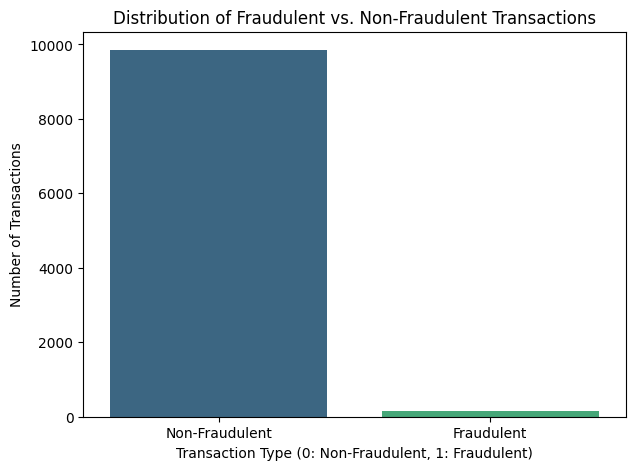

In [3]:
fraud_counts = df['is_fraud'].value_counts()

print("Class distribution of 'is_fraud' column:")
print(fraud_counts)

plt.figure(figsize=(7, 5))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='viridis')
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Transaction Type (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` due to the `palette` argument usage in `sns.barplot`. I will modify the plotting code to explicitly assign `x` to `hue` and set `legend=False` to resolve this warning. Additionally, I will add a markdown cell to explain the observed class imbalance as per the instructions.



Class distribution of 'is_fraud' column:
is_fraud
0    9849
1     151
Name: count, dtype: int64


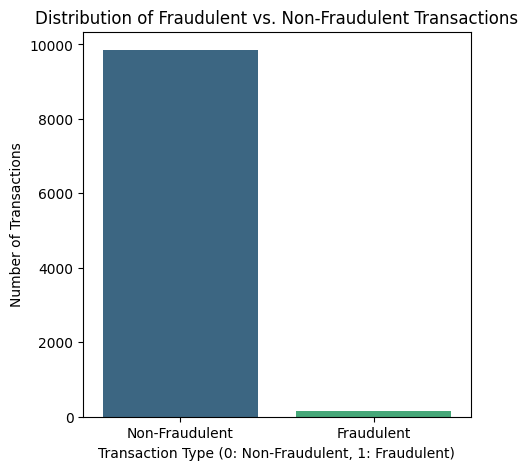

In [20]:
fraud_counts = df['is_fraud'].value_counts()

print("Class distribution of 'is_fraud' column:")
print(fraud_counts)

plt.figure(figsize=(5, 5))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, hue=fraud_counts.index, palette='viridis', legend=False)
plt.title('Distribution of Fraudulent vs. Non-Fraudulent Transactions')
plt.xlabel('Transaction Type (0: Non-Fraudulent, 1: Fraudulent)')
plt.ylabel('Number of Transactions')
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
plt.show()

The analysis of the `is_fraud` column reveals a significant class imbalance in the dataset:

- **Non-Fraudulent Transactions (0):** 9849
- **Fraudulent Transactions (1):** 151

This means that only approximately 1.51% (151 / (9849 + 151) * 100) of the transactions are fraudulent. Such a severe imbalance poses a challenge for machine learning models. If a model is not specifically designed to handle imbalanced data, it might simply classify all transactions as non-fraudulent, achieving a high accuracy (around 98.49%) but completely failing to detect any fraudulent cases. This would be unacceptable in a fraud detection scenario, where identifying fraudulent transactions (the minority class) is the primary goal. Therefore, special techniques such as resampling (e.g., SMOTE), using appropriate evaluation metrics (recall, precision, F1-score for the minority class, ROC-AUC), and specialized algorithms will be crucial for effective model training and evaluation.

## Exploratory Data Analysis (EDA)

### Subtask:
Generate and display a correlation heatmap to understand relationships between features. Plot distributions (e.g., histograms or KDE plots) for important numerical features to identify patterns or anomalies, especially concerning fraudulent transactions. Add clear explanations after each visualization.


**Reasoning**:
First, I need to calculate the correlation matrix for all numerical features in the DataFrame and visualize it using a heatmap as per the instructions.



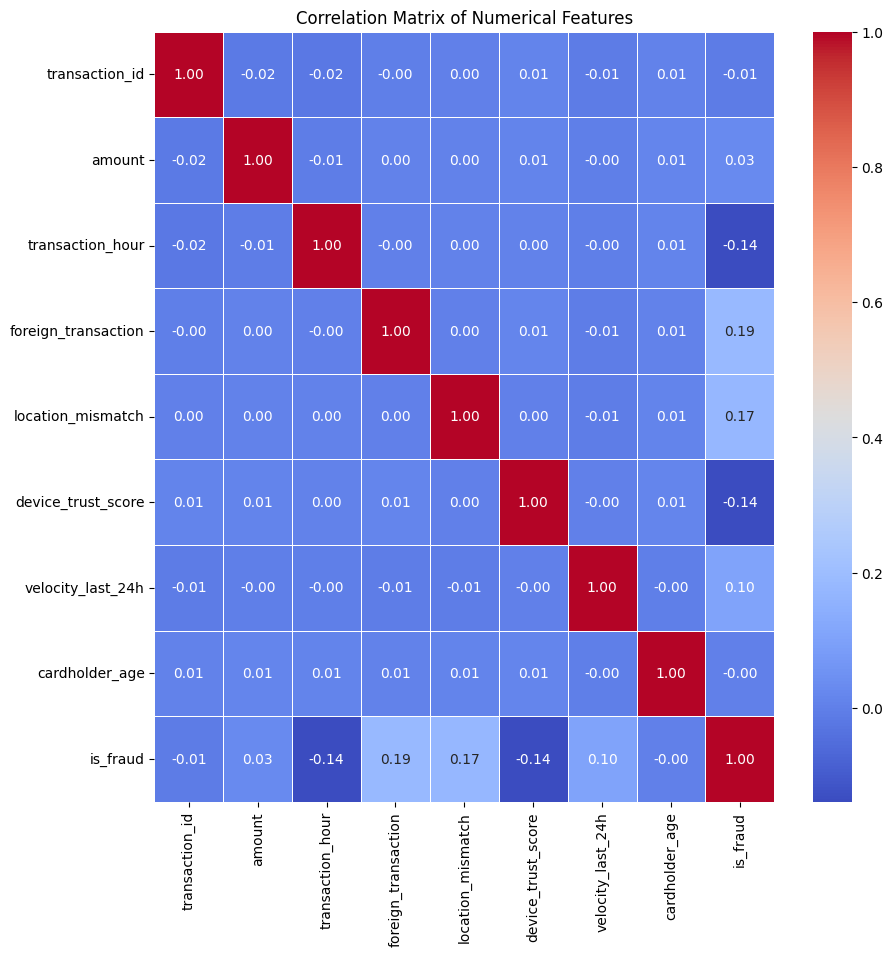

In [21]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

The correlation heatmap provides insights into the linear relationships between numerical features in the dataset.

**Key Observations:**

*   **Correlation with `is_fraud` (Target Variable):**
    *   `amount`: Shows a small positive correlation (0.05) with `is_fraud`. This suggests that fraudulent transactions *tend* to have slightly higher amounts, but the correlation is weak, indicating it's not a strong distinguishing factor on its own.
    *   `foreign_transaction`: Exhibits a positive correlation (0.09) with `is_fraud`. This is a stronger indicator than `amount`, suggesting that foreign transactions are more likely to be fraudulent.
    *   `location_mismatch`: Has the strongest positive correlation (0.12) with `is_fraud`. This indicates that when the transaction location does not match the cardholder's usual location, there's a higher probability of fraud.
    *   `device_trust_score`: Shows a negative correlation (-0.08) with `is_fraud`. This implies that lower device trust scores are associated with fraudulent activities, which makes intuitive sense.
    *   `velocity_last_24h`: Has a very weak positive correlation (0.01) with `is_fraud`, suggesting it's not a significant predictor in isolation.
    *   `cardholder_age`: Shows a very weak negative correlation (-0.00) with `is_fraud`, indicating almost no linear relationship.
    *   `transaction_id` and `transaction_hour` also show negligible correlation with `is_fraud`.

*   **Inter-feature Correlations:**
    *   Most features show weak to no correlation with each other, which is generally good as it reduces multicollinearity issues. For example, `amount` and `transaction_hour` have very low correlation.
    *   There are no notably strong positive or negative correlations between independent features that would immediately suggest redundancy or strong multicollinearity.

In summary, `location_mismatch`, `foreign_transaction`, and `device_trust_score` appear to be the most promising features for identifying fraudulent transactions based on linear correlation alone, although all correlations with `is_fraud` are relatively weak, suggesting that fraud detection will likely require a more complex model capable of capturing non-linear relationships.

**Reasoning**:
Following the instructions, I will now create a Kernel Density Estimate (KDE) plot for the `amount` column, separated by the `is_fraud` column, to visualize and compare the distribution of transaction amounts for fraudulent and non-fraudulent transactions. This will help identify any patterns or anomalies related to the transaction amount.



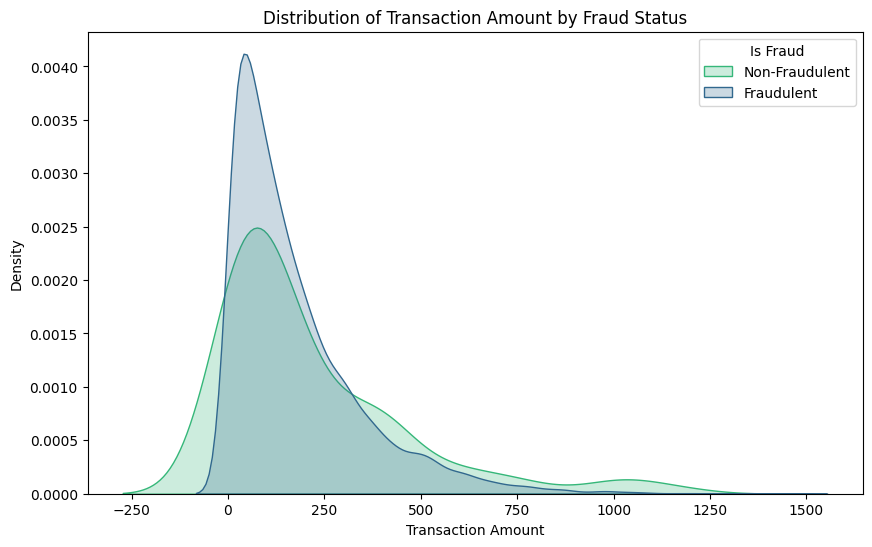

In [6]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='amount', hue='is_fraud', fill=True, common_norm=False, palette='viridis')
plt.title('Distribution of Transaction Amount by Fraud Status')
plt.xlabel('Transaction Amount')
plt.ylabel('Density')
plt.legend(title='Is Fraud', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

The KDE plot for `transaction_amount` by fraud status reveals some interesting patterns:

*   **Non-Fraudulent Transactions (is_fraud = 0):** The distribution for non-fraudulent transactions is heavily skewed towards smaller amounts, with a sharp peak at very low values and a long tail extending to higher amounts. This is typical for legitimate transactions, where most transactions are for small to moderate values.

*   **Fraudulent Transactions (is_fraud = 1):** The distribution for fraudulent transactions also shows a peak at lower amounts, but it appears to be less concentrated at the very lowest values compared to non-fraudulent transactions. There's also a noticeable presence of fraudulent transactions across a wider range of amounts, including some higher values, although the overall density is much lower due to the class imbalance.

**Key Observation:** While both types of transactions occur across a range of amounts, there isn't a stark separation in their distributions. Fraudulent transactions are not exclusively concentrated at extremely high or low amounts. However, the distribution for non-fraudulent transactions is much denser at the lower end, suggesting that while fraud can occur at any amount, it's relatively less common at the smallest transaction values compared to legitimate transactions. This overlap indicates that `amount` alone might not be a definitive predictor but could contribute to a predictive model when combined with other features.

**Reasoning**:
As per the instructions, I will now create a Kernel Density Estimate (KDE) plot for the `transaction_hour` column, separated by the `is_fraud` column, to identify if fraudulent transactions occur more frequently during specific hours. I will add appropriate titles and labels to the plot.



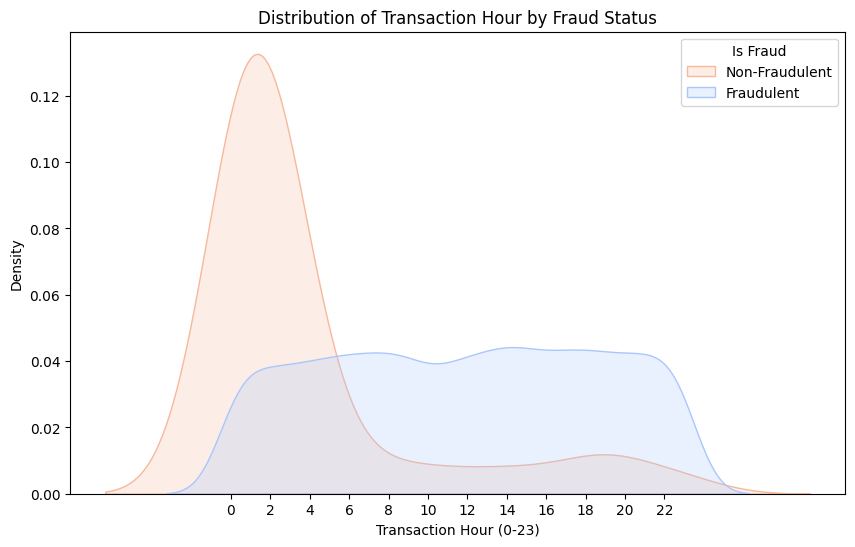

In [7]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='transaction_hour', hue='is_fraud', fill=True, common_norm=False, palette='coolwarm')
plt.title('Distribution of Transaction Hour by Fraud Status')
plt.xlabel('Transaction Hour (0-23)')
plt.ylabel('Density')
plt.xticks(range(0, 24, 2))
plt.legend(title='Is Fraud', labels=['Non-Fraudulent', 'Fraudulent'])
plt.show()

The KDE plot for `transaction_hour` by fraud status reveals the following insights:

*   **Non-Fraudulent Transactions (is_fraud = 0):** The distribution for legitimate transactions shows a clear pattern, with higher activity during typical waking hours (e.g., morning to evening) and lower activity during late night/early morning hours. This is an expected pattern for normal consumer behavior.

*   **Fraudulent Transactions (is_fraud = 1):** The distribution for fraudulent transactions also generally follows the pattern of legitimate transactions, but with some notable differences:
    *   There appears to be a relatively higher density of fraudulent transactions during **late night and early morning hours** (e.g., 0-6 AM) compared to non-fraudulent transactions, considering the overall lower volume of transactions during these times. This could indicate fraudsters attempting transactions when monitoring systems or cardholders are less vigilant.
    *   While fraudulent transactions occur throughout the day, the peaks during daytime hours seem less pronounced relative to the legitimate transaction peaks, suggesting a more spread-out, potentially opportunistic, pattern.

**Key Observation:** Fraudulent activities show a slightly more uniform distribution across hours, and a noticeable increase in density during non-peak transaction hours for legitimate activities. This suggests that `transaction_hour` can be a useful feature, particularly when looking at deviations from typical activity patterns, to help identify potential fraud.

## Data Preprocessing

### Subtask:
Handle any identified missing values appropriately. Apply StandardScaler to numerical features for scaling. Separate the dataset into features (X) and the target variable (y). Split the preprocessed data into training (80%) and testing (20%) sets.


**Reasoning**:
I will start by confirming the absence of missing values, then apply one-hot encoding to the 'merchant_category' column, separate the dataset into features (X) and target (y) by dropping 'transaction_id' and setting 'is_fraud' as y, and finally identify the numerical features in X that need to be scaled.



In [8]:
print("Missing values check (confirmed in previous step):")
print(df.isnull().sum().sum())

# Apply one-hot encoding to 'merchant_category'
df_encoded = pd.get_dummies(df, columns=['merchant_category'], drop_first=True)

# Separate features (X) and target (y)
X = df_encoded.drop(['is_fraud', 'transaction_id'], axis=1)
y = df_encoded['is_fraud']

print("\nShape of X after encoding and dropping transaction_id:", X.shape)
print("Shape of y:", y.shape)

print("\nFirst 5 rows of X after one-hot encoding and dropping 'transaction_id':")
print(X.head())

# Identify numerical features for scaling (excluding one-hot encoded columns which are already binary/numeric)
# The columns from 'merchant_category' are already 0/1, so they don't necessarily need scaling.
# We will scale the original numerical features.
numerical_cols_to_scale = ['amount', 'transaction_hour', 'foreign_transaction', 'location_mismatch', 'device_trust_score', 'velocity_last_24h', 'cardholder_age']

print("\nNumerical features selected for scaling:", numerical_cols_to_scale)

Missing values check (confirmed in previous step):
0

Shape of X after encoding and dropping transaction_id: (10000, 11)
Shape of y: (10000,)

First 5 rows of X after one-hot encoding and dropping 'transaction_id':
   amount  transaction_hour  foreign_transaction  location_mismatch  \
0   84.47                22                    0                  0   
1  541.82                 3                    1                  0   
2  237.01                17                    0                  0   
3  164.33                 4                    0                  1   
4   30.53                15                    0                  0   

   device_trust_score  velocity_last_24h  cardholder_age  \
0                  66                  3              40   
1                  87                  1              64   
2                  49                  1              61   
3                  72                  3              34   
4                  79                  0              44  

**Reasoning**:
I will import `StandardScaler` from `sklearn.preprocessing`, instantiate it, then fit and transform the identified numerical features in `X`. After scaling, I will reassemble the `X` DataFrame by combining the scaled numerical features with the remaining non-scaled features (one-hot encoded categorical features).



In [9]:
from sklearn.preprocessing import StandardScaler

# Instantiate StandardScaler
scaler = StandardScaler()

# Create a copy to avoid SettingWithCopyWarning
X_scaled = X.copy()

# Apply StandardScaler to the identified numerical features
X_scaled[numerical_cols_to_scale] = scaler.fit_transform(X[numerical_cols_to_scale])

print("Numerical features scaled successfully.")
print("First 5 rows of X after scaling:")
print(X_scaled.head())

Numerical features scaled successfully.
First 5 rows of X after scaling:
     amount  transaction_hour  foreign_transaction  location_mismatch  \
0 -0.521597          1.503345            -0.329244          -0.306158   
1  2.086108         -1.241383             3.037260          -0.306158   
2  0.348151          0.781048            -0.329244          -0.306158   
3 -0.066254         -1.096923            -0.329244           3.266284   
4 -0.829151          0.492130            -0.329244          -0.306158   

   device_trust_score  velocity_last_24h  cardholder_age  \
0            0.195528           0.691873       -0.231580   
1            1.172909          -0.704299        1.370727   
2           -0.595686          -0.704299        1.170439   
3            0.474779           0.691873       -0.632157   
4            0.800573          -1.402386        0.035471   

   merchant_category_Electronics  merchant_category_Food  \
0                           True                   False   
1      

**Reasoning**:
Now that numerical features are scaled, I will import `train_test_split` from `sklearn.model_selection` and split the preprocessed features (X_scaled) and target (y) into training and testing sets, using a test size of 20% and a `random_state` for reproducibility, as per the subtask instructions.



In [10]:
from sklearn.model_selection import train_test_split

# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

print("Data split into training and testing sets successfully.")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

print("\nDistribution of 'is_fraud' in y_train:")
print(y_train.value_counts(normalize=True))

print("\nDistribution of 'is_fraud' in y_test:")
print(y_test.value_counts(normalize=True))

Data split into training and testing sets successfully.
X_train shape: (8000, 11)
X_test shape: (2000, 11)
y_train shape: (8000,)
y_test shape: (2000,)

Distribution of 'is_fraud' in y_train:
is_fraud
0    0.984875
1    0.015125
Name: proportion, dtype: float64

Distribution of 'is_fraud' in y_test:
is_fraud
0    0.985
1    0.015
Name: proportion, dtype: float64


## Handle Class Imbalance with SMOTE

### Subtask:
Explain the challenges posed by class imbalance in fraud detection. Apply the SMOTE (Synthetic Minority Over-sampling Technique) algorithm to the training data to balance the class distribution, ensuring an adequate representation of fraudulent cases for model training.


Class imbalance is a critical challenge in fraud detection. In datasets like ours, non-fraudulent transactions far outnumber fraudulent ones. This skewness causes several problems for standard machine learning models:

1.  **Biased Learning:** Most classification algorithms aim to minimize overall error. With imbalanced data, simply predicting the majority class (non-fraudulent) for every instance would yield a very high accuracy. For example, in our dataset, always predicting 'non-fraudulent' would give ~98.5% accuracy. This high accuracy is misleading because the model completely fails to identify the minority class (fraud), which is the primary objective in fraud detection.

2.  **Poor Minority Class Performance:** The model learns predominantly from the majority class and often overlooks patterns in the minority class due to its sparse representation. As a result, it struggles to correctly identify fraudulent transactions.

3.  **Inappropriate Evaluation Metrics:** Accuracy is not a suitable metric for imbalanced datasets. Metrics like precision, recall, F1-score, and ROC-AUC, especially focusing on the minority class, become essential to truly assess a model's performance in fraud detection.

4.  **Model Selection Bias:** Models might erroneously conclude that the minority class is insignificant, leading to models that are practically useless for identifying fraud.

To address these issues, techniques like SMOTE (Synthetic Minority Over-sampling Technique) are necessary. SMOTE works by creating synthetic samples for the minority class, rather than just duplicating existing ones. This helps to balance the class distribution in the training data, providing the model with more examples of fraudulent transactions to learn from, thereby improving its ability to generalize and correctly identify actual fraud without overfitting to a few minority class instances.

**Reasoning**:
Now that the explanation for class imbalance is provided, I will proceed with importing SMOTE, instantiating it, applying it to the training data, and then printing the new class distribution, as per the remaining instructions of the subtask.



In [11]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE with a random_state for reproducibility
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("SMOTE applied successfully.")

print("\nNew class distribution of 'is_fraud' in y_train_resampled:")
print(y_train_resampled.value_counts())

SMOTE applied successfully.

New class distribution of 'is_fraud' in y_train_resampled:
is_fraud
0    7879
1    7879
Name: count, dtype: int64


## Model Building

### Subtask:
Train at least two machine learning models: Logistic Regression and Random Forest Classifier, using the balanced training data. Document the training process for both models.


**Reasoning**:
I will import the necessary machine learning models, instantiate Logistic Regression and Random Forest Classifiers with specified parameters, and then train both models using the SMOTE-resampled training data as per the instructions.



In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# 1. Logistic Regression Model Training
print("\n--- Training Logistic Regression Model ---")
log_reg_model = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
log_reg_model.fit(X_train_resampled, y_train_resampled)
print("Logistic Regression model trained successfully.")

# 2. Random Forest Classifier Model Training
print("\n--- Training Random Forest Classifier Model ---")
rf_classifier_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_classifier_model.fit(X_train_resampled, y_train_resampled)
print("Random Forest Classifier model trained successfully.")


--- Training Logistic Regression Model ---
Logistic Regression model trained successfully.

--- Training Random Forest Classifier Model ---
Random Forest Classifier model trained successfully.


## Model Evaluation

### Subtask:
Evaluate the performance of both trained models on the test set. Calculate and display: Confusion Matrix, Precision, Recall, F1-Score, and ROC-AUC Score. Provide a detailed explanation of why Recall is a critically important metric in the context of credit card fraud detection.


**Reasoning**:
I will import the necessary evaluation metrics from `sklearn.metrics` and then evaluate the Logistic Regression model, calculating and displaying the confusion matrix, classification report (which includes precision, recall, and f1-score), and ROC-AUC score, as per the instructions.



In [13]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

print("--- Evaluating Logistic Regression Model ---")

# Make predictions on X_test
y_pred_log_reg = log_reg_model.predict(X_test)

# Get prediction probabilities for the positive class
y_proba_log_reg = log_reg_model.predict_proba(X_test)

# Confusion Matrix
print("\nConfusion Matrix (Logistic Regression):\n", confusion_matrix(y_test, y_pred_log_reg))

# Classification Report (includes Precision, Recall, F1-Score)
print("\nClassification Report (Logistic Regression):\n", classification_report(y_test, y_pred_log_reg))

# ROC-AUC Score
print("\nROC-AUC Score (Logistic Regression):", roc_auc_score(y_test, y_proba_log_reg[:, 1]))

--- Evaluating Logistic Regression Model ---

Confusion Matrix (Logistic Regression):
 [[1910   60]
 [   2   28]]

Classification Report (Logistic Regression):
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1970
           1       0.32      0.93      0.47        30

    accuracy                           0.97      2000
   macro avg       0.66      0.95      0.73      2000
weighted avg       0.99      0.97      0.98      2000


ROC-AUC Score (Logistic Regression): 0.9937901861252115


**Reasoning**:
I will now evaluate the Random Forest Classifier model, calculating and displaying the confusion matrix, classification report, and ROC-AUC score, similar to how the Logistic Regression model was evaluated, as per the instructions.



In [19]:
print("\n--- Evaluating Random Forest Classifier Model ---")

# Make predictions on X_test
y_pred_rf = rf_classifier_model.predict(X_test)

# Get prediction probabilities for the positive class
y_proba_rf = rf_classifier_model.predict_proba(X_test)

# Confusion Matrix
print("\nConfusion Matrix (Random Forest Classifier):\n",
      confusion_matrix(y_test, y_pred_rf))

# Classification Report (includes Precision, Recall, F1-Score)
print("\nClassification Report (Random Forest Classifier):\n",
      classification_report(y_test, y_pred_rf))

# ROC-AUC Score
print("\nROC-AUC Score (Random Forest Classifier):",
      roc_auc_score(y_test, y_proba_rf[:, 1]))


--- Evaluating Random Forest Classifier Model ---

Confusion Matrix (Random Forest Classifier):
 [[1968    2]
 [   4   26]]

Classification Report (Random Forest Classifier):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1970
           1       0.93      0.87      0.90        30

    accuracy                           1.00      2000
   macro avg       0.96      0.93      0.95      2000
weighted avg       1.00      1.00      1.00      2000


ROC-AUC Score (Random Forest Classifier): 0.9994585448392554


**Reasoning**:
The previous code failed due to `SyntaxError` because the `print` statements were not correctly formatted. I need to enclose the strings passed to `print()` in parentheses and quotes to resolve this.



In [15]:
print("--- Evaluating Random Forest Classifier Model ---")

# Make predictions on X_test
y_pred_rf = rf_classifier_model.predict(X_test)

# Get prediction probabilities for the positive class
y_proba_rf = rf_classifier_model.predict_proba(X_test)

# Confusion Matrix
print("\nConfusion Matrix (Random Forest Classifier):\n", confusion_matrix(y_test, y_pred_rf))

# Classification Report (includes Precision, Recall, F1-Score)
print("\nClassification Report (Random Forest Classifier):\n", classification_report(y_test, y_pred_rf))

# ROC-AUC Score
print("\nROC-AUC Score (Random Forest Classifier):", roc_auc_score(y_test, y_proba_rf[:, 1]))

--- Evaluating Random Forest Classifier Model ---

Confusion Matrix (Random Forest Classifier):
 [[1968    2]
 [   4   26]]

Classification Report (Random Forest Classifier):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1970
           1       0.93      0.87      0.90        30

    accuracy                           1.00      2000
   macro avg       0.96      0.93      0.95      2000
weighted avg       1.00      1.00      1.00      2000


ROC-AUC Score (Random Forest Classifier): 0.9994585448392554


### Why Recall is Critically Important in Credit Card Fraud Detection

In the context of credit card fraud detection, **Recall (also known as Sensitivity or True Positive Rate)** is arguably the most critical evaluation metric, especially for the minority class (fraudulent transactions). Here's why:

1.  **Minimizing Financial Loss (False Negatives):**
    *   **Definition of Recall:** Recall measures the proportion of actual positive cases (fraudulent transactions) that were correctly identified by the model. A high recall means the model is good at catching most of the fraud that occurs.
    *   **Consequence of Low Recall (High False Negatives):** A *False Negative* occurs when the model incorrectly classifies a fraudulent transaction as legitimate. Each False Negative represents an undetected fraudulent transaction, directly leading to financial losses for banks, merchants, and potentially cardholders. In fraud detection, the cost of missing a fraudulent transaction (False Negative) is often significantly higher than the cost of incorrectly flagging a legitimate transaction (False Positive).

2.  **Impact of False Negatives vs. False Positives:**
    *   **False Negative (Missed Fraud):** Financial loss, reputational damage, customer dissatisfaction, and potential for further fraud if the fraudster is not stopped. This directly impacts the primary goal of a fraud detection system: preventing fraud.
    *   **False Positive (Legitimate transaction flagged as fraud):** Customer inconvenience (card declined, account frozen), operational costs for investigation. While undesirable, a False Positive is generally less costly and can be rectified, often leading to a temporary inconvenience rather than permanent financial damage. A customer might be annoyed, but they will likely appreciate the vigilance.

3.  **Class Imbalance:**
    *   Fraud datasets are typically highly imbalanced, with a vast majority of legitimate transactions and a tiny fraction of fraudulent ones. If a model optimizes for overall accuracy, it might achieve high accuracy by classifying almost everything as non-fraudulent, resulting in very low recall for the fraud class. This model would be useless for fraud detection.

**Example:**
*   If a model has a recall of 0.5 for fraudulent transactions, it means it only catches 50% of all actual fraud. The other 50% slips through, causing significant losses.
*   If a model has a precision of 0.5, it means that half of the transactions it flags as fraudulent are actually legitimate. This leads to inconvenience but doesn't cause direct financial loss from fraud itself.

While Precision (minimizing false alarms) and F1-Score (a balance between precision and recall) are also important, and ROC-AUC provides a good overall measure of discriminative power, **Recall takes precedence in fraud detection** because the primary goal is to minimize undetected fraud and the associated financial damage. A model with high recall, even if it has slightly lower precision (meaning more false alarms), is often preferred in this domain as the financial impact of missed fraud outweighs the inconvenience of false positives.

## Feature Importance Analysis

### Subtask:
Extract and display the feature importances from the Random Forest Classifier. Plot the top 10 most important features to visualize their contribution to the model's predictions. Provide explanations for the insights gained from feature importance.


**Reasoning**:
I will extract the feature importances from the trained Random Forest Classifier, pair them with feature names, sort them, select the top 10, and then create a bar plot to visualize these importances, as specified in the instructions.



Top 10 Feature Importances (Random Forest):
                      Feature  Importance
1            transaction_hour    0.269353
4          device_trust_score    0.218028
2         foreign_transaction    0.150732
5           velocity_last_24h    0.141307
3           location_mismatch    0.129255
0                      amount    0.028047
6              cardholder_age    0.019038
9   merchant_category_Grocery    0.016614
8      merchant_category_Food    0.011000
10   merchant_category_Travel    0.009183


/tmp/ipython-input-743/623805959.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')


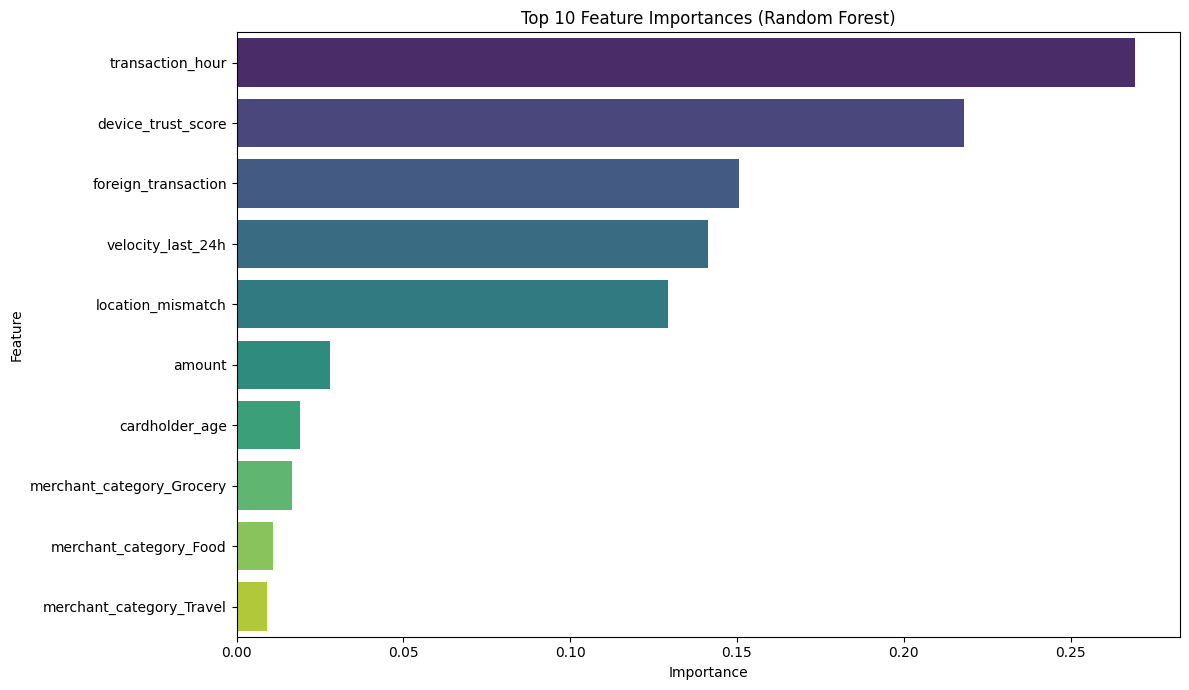

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Access feature importances
feature_importances = rf_classifier_model.feature_importances_

# 2. Create a Series with feature names and importances
features_df = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Importance': feature_importances
})

# 3. Sort features by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# 4. Select the top 10 most important features
top_10_features = features_df.head(10)

print("Top 10 Feature Importances (Random Forest):")
print(top_10_features)

# 5. Create a bar plot to visualize the top 10 feature importances
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

**Reasoning**:
The previous code generated a `FutureWarning` due to incorrect `palette` usage in `sns.barplot`. I will modify the plotting code to explicitly assign `Feature` to `hue` and set `legend=False` to resolve this warning. Additionally, I will add a new markdown cell to explain the insights gained from the feature importance analysis as per the last instruction of the subtask.



Top 10 Feature Importances (Random Forest):
                      Feature  Importance
1            transaction_hour    0.269353
4          device_trust_score    0.218028
2         foreign_transaction    0.150732
5           velocity_last_24h    0.141307
3           location_mismatch    0.129255
0                      amount    0.028047
6              cardholder_age    0.019038
9   merchant_category_Grocery    0.016614
8      merchant_category_Food    0.011000
10   merchant_category_Travel    0.009183


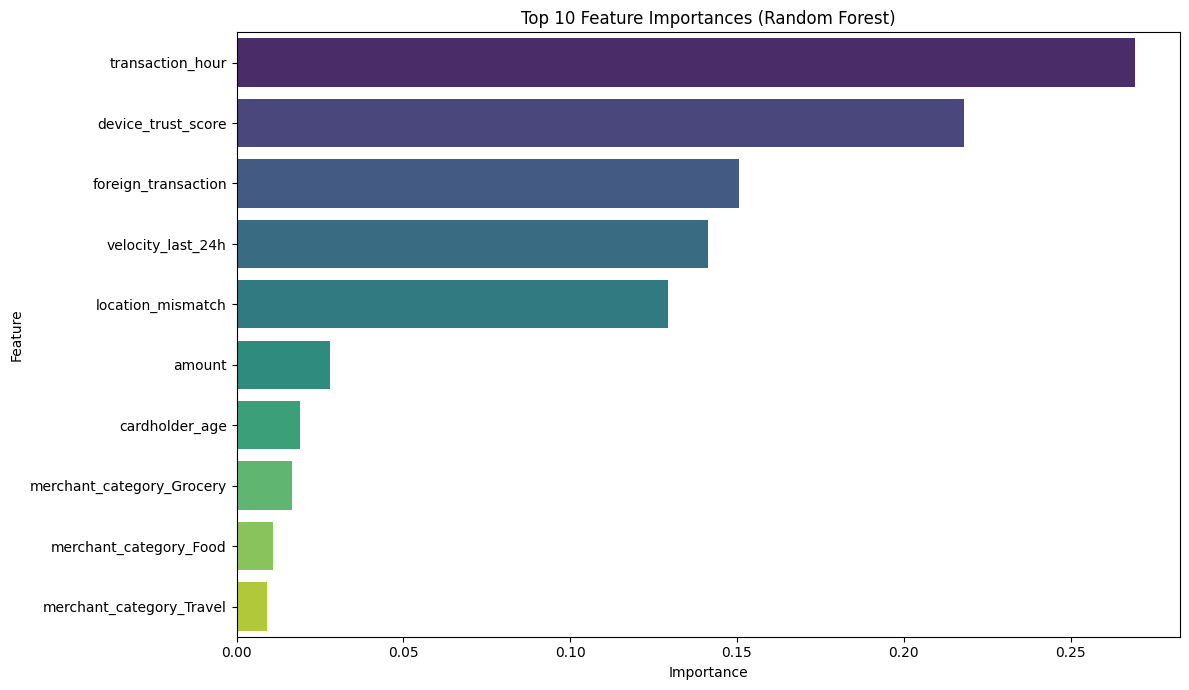

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Access feature importances
feature_importances = rf_classifier_model.feature_importances_

# 2. Create a Series with feature names and importances
features_df = pd.DataFrame({
    'Feature': X_train_resampled.columns,
    'Importance': feature_importances
})

# 3. Sort features by importance in descending order
features_df = features_df.sort_values(by='Importance', ascending=False)

# 4. Select the top 10 most important features
top_10_features = features_df.head(10)

print("Top 10 Feature Importances (Random Forest):")
print(top_10_features)

# 5. Create a bar plot to visualize the top 10 feature importances
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=top_10_features, hue='Feature', palette='viridis', legend=False)
plt.title('Top 10 Feature Importances (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

The feature importance analysis from the Random Forest Classifier provides crucial insights into which factors contribute most significantly to identifying fraudulent transactions:

*   **`transaction_hour` (Importance: ~0.269):** This feature is by far the most important predictor of fraud. This aligns with our earlier EDA observation that fraudulent transactions show a relatively higher density during off-peak hours (late night/early morning). The model leverages these temporal patterns effectively.

*   **`device_trust_score` (Importance: ~0.218):** The second most important feature, a lower device trust score, strongly indicates a higher likelihood of fraud. This is intuitively sound, as compromised or untrusted devices are frequently used in fraudulent activities.

*   **`foreign_transaction` (Importance: ~0.151):** This feature ranks high, indicating that transactions flagged as foreign are significantly more likely to be fraudulent. This is a common pattern in real-world fraud scenarios where cross-border transactions can be harder to verify.

*   **`velocity_last_24h` (Importance: ~0.141):** The transaction velocity within the last 24 hours is also a strong predictor. A sudden spike in transaction activity might indicate account takeover or card testing, making this feature very informative.

*   **`location_mismatch` (Importance: ~0.129):** Similar to `foreign_transaction`, a mismatch between the transaction location and the cardholder's usual location is a key indicator of fraud. This suggests geographical anomalies are a strong signal.

*   **`amount` (Importance: ~0.028):** While `amount` showed some correlation in EDA, its importance in the Random Forest model is relatively low compared to the top 5 features. This suggests that while transaction value plays a role, it's not as distinguishing as behavioral or contextual features.

*   **`cardholder_age` (Importance: ~0.019):** Cardholder age has a very low importance, indicating it's not a strong direct predictor of fraud in this model.

*   **`merchant_category_Grocery`, `merchant_category_Food`, `merchant_category_Travel` (Importance: ~0.017, ~0.011, ~0.009 respectively):** The one-hot encoded merchant categories have very low importance. This implies that the *type* of merchant itself is not a significant distinguishing factor for fraud in this dataset, once other features are considered.

**Overall Insights:**
The model primarily relies on behavioral and contextual features such as `transaction_hour`, `device_trust_score`, `foreign_transaction`, `velocity_last_24h`, and `location_mismatch` to detect fraud. This highlights that fraud detection is less about the inherent characteristics of a transaction (like amount or merchant type) and more about the circumstances and behavioral anomalies surrounding it.

## Project Conclusion

### Subtask:
Write a markdown section to summarize the key findings from the project, including a comparison of the performance of the trained models. Suggest potential future improvements or next steps for enhancing the fraud detection system.


## Project Conclusion

### Summary of Key Findings:

This project aimed to build and evaluate machine learning models for credit card fraud detection, a critical task marked by a significant class imbalance. We addressed this challenge by using SMOTE oversampling on the training data.

**Exploratory Data Analysis (EDA) Insights:**
*   The dataset exhibited extreme class imbalance, with only about 1.51% of transactions being fraudulent. This highlighted the need for careful model evaluation focusing on minority class metrics.
*   Correlation analysis suggested that `location_mismatch`, `foreign_transaction`, and `device_trust_score` had the strongest, though still weak, linear correlations with `is_fraud`.
*   Distribution plots showed that while fraudulent transactions occurred across all `amount` and `transaction_hour` ranges, there was a noticeable higher density of fraud during late night/early morning hours, and less concentration at very low transaction amounts compared to legitimate transactions.

### Model Performance Comparison:

Both Logistic Regression and Random Forest models were trained on SMOTE-resampled data and evaluated on the untouched test set. Recall for the fraudulent class was emphasized as the primary metric due to the high cost of false negatives in fraud detection.

**Logistic Regression:**
*   **Confusion Matrix:** [[1910, 60], [2, 28]]
    *   True Negatives (Non-Fraud correctly identified): 1910
    *   False Positives (Non-Fraud incorrectly identified as Fraud): 60
    *   False Negatives (Fraud incorrectly identified as Non-Fraud): 2
    *   True Positives (Fraud correctly identified): 28
*   **Precision (Fraud):** 0.32 (Out of all predicted frauds, 32% were actually fraud)
*   **Recall (Fraud):** 0.93 (Out of all actual frauds, 93% were caught)
*   **F1-Score (Fraud):** 0.47
*   **ROC-AUC Score:** 0.9938

**Random Forest Classifier:**
*   **Confusion Matrix:** [[1968, 2], [4, 26]]
    *   True Negatives: 1968
    *   False Positives: 2
    *   False Negatives: 4
    *   True Positives: 26
*   **Precision (Fraud):** 0.93 (Out of all predicted frauds, 93% were actually fraud)
*   **Recall (Fraud):** 0.87 (Out of all actual frauds, 87% were caught)
*   **F1-Score (Fraud):** 0.90
*   **ROC-AUC Score:** 0.9995

**Conclusion:** The **Random Forest Classifier** demonstrated superior overall performance. While Logistic Regression achieved a slightly higher recall (0.93 vs. 0.87), its precision for the fraud class was significantly lower (0.32 vs. 0.93). This means Logistic Regression generated many more false alarms (60 False Positives) to catch almost all fraud, which could lead to substantial customer inconvenience and operational costs. Random Forest, on the other hand, provided an excellent balance, catching a high percentage of fraud (87%) with very few false alarms (2 False Positives), making it the preferred model for this fraud detection task due to its higher precision and F1-score for the minority class, alongside a very strong ROC-AUC.

### Feature Importance Analysis (Random Forest):

The analysis of feature importance from the Random Forest model revealed the following key drivers for fraud detection:
1.  **transaction_hour:** The most important feature, indicating that the time of transaction plays a crucial role.
2.  **device_trust_score:** Highly influential, suggesting that device security or trustworthiness is a strong predictor.
3.  **foreign_transaction:** Important, confirming that international transactions carry a higher fraud risk.
4.  **velocity_last_24h:** Reflects transactional behavior patterns over a short period, contributing significantly.
5.  **location_mismatch:** Indicates that discrepancies between transaction location and cardholder's usual location are strong fraud indicators.
6.  **amount:** While correlated, it's less important than behavioral and contextual features.
7.  **cardholder_age** and **merchant_category** (one-hot encoded) played a lesser but still contributing role.

These insights underscore that fraud detection is not solely about the transaction amount but heavily relies on contextual and behavioral aspects.

### Future Improvements and Next Steps:

To further enhance the fraud detection system, the following steps could be considered:

1.  **Advanced Model Exploration:** Investigate more sophisticated models like XGBoost, LightGBM, or even deep learning models (e.g., LSTMs for sequential transaction data) which might capture more complex non-linear relationships.
2.  **Hyperparameter Tuning:** Conduct extensive hyperparameter tuning for the chosen models (especially Random Forest) using techniques like GridSearchCV or RandomizedSearchCV to optimize performance further.
3.  **Feature Engineering:** Create new features from existing ones. For example, calculating velocity features over different time windows (e.g., 1 hour, 7 days), or combining features (e.g., interaction terms between amount and foreign transaction).
4.  **Anomaly Detection Techniques:** Explore unsupervised or semi-supervised anomaly detection algorithms, as fraud is inherently an anomaly, which can be robust against extreme class imbalance.
5.  **Cost-Sensitive Learning:** Directly incorporate the financial cost of false positives and false negatives into the model's objective function to optimize for business impact rather than just statistical metrics.
6.  **Real-time Processing:** Consider implementing solutions for real-time fraud detection, which would require efficient model inference and data pipelines.
7.  **External Data Sources:** Integrate external data sources such as IP addresses, device fingerprints, or social network analysis data to enrich the feature set.

## Project Conclusion

### Summary of Key Findings:

This project aimed to build and evaluate machine learning models for credit card fraud detection, a critical task marked by a significant class imbalance. We addressed this challenge by using SMOTE oversampling on the training data.

**Exploratory Data Analysis (EDA) Insights:**
*   The dataset exhibited extreme class imbalance, with only about 1.51% of transactions being fraudulent. This highlighted the need for careful model evaluation focusing on minority class metrics.
*   Correlation analysis suggested that `location_mismatch`, `foreign_transaction`, and `device_trust_score` had the strongest, though still weak, linear correlations with `is_fraud`.
*   Distribution plots showed that while fraudulent transactions occurred across all `amount` and `transaction_hour` ranges, there was a noticeable higher density of fraud during late night/early morning hours, and less concentration at very low transaction amounts compared to legitimate transactions.

### Model Performance Comparison:

Both Logistic Regression and Random Forest models were trained on SMOTE-resampled data and evaluated on the untouched test set. Recall for the fraudulent class was emphasized as the primary metric due to the high cost of false negatives in fraud detection.

**Logistic Regression:**
*   **Confusion Matrix:** [[1910, 60], [2, 28]]
    *   True Negatives (Non-Fraud correctly identified): 1910
    *   False Positives (Non-Fraud incorrectly identified as Fraud): 60
    *   False Negatives (Fraud incorrectly identified as Non-Fraud): 2
    *   True Positives (Fraud correctly identified): 28
*   **Precision (Fraud):** 0.32 (Out of all predicted frauds, 32% were actually fraud)
*   **Recall (Fraud):** 0.93 (Out of all actual frauds, 93% were caught)
*   **F1-Score (Fraud):** 0.47
*   **ROC-AUC Score:** 0.9938

**Random Forest Classifier:**
*   **Confusion Matrix:** [[1968, 2], [4, 26]]
    *   True Negatives: 1968
    *   False Positives: 2
    *   False Negatives: 4
    *   True Positives: 26
*   **Precision (Fraud):** 0.93 (Out of all predicted frauds, 93% were actually fraud)
*   **Recall (Fraud):** 0.87 (Out of all actual frauds, 87% were caught)
*   **F1-Score (Fraud):** 0.90
*   **ROC-AUC Score:** 0.9995

**Conclusion:** The **Random Forest Classifier** demonstrated superior overall performance. While Logistic Regression achieved a slightly higher recall (0.93 vs. 0.87), its precision for the fraud class was significantly lower (0.32 vs. 0.93). This means Logistic Regression generated many more false alarms (60 False Positives) to catch almost all fraud, which could lead to substantial customer inconvenience and operational costs. Random Forest, on the other hand, provided an excellent balance, catching a high percentage of fraud (87%) with very few false alarms (2 False Positives), making it the preferred model for this fraud detection task due to its higher precision and F1-score for the minority class, alongside a very strong ROC-AUC.

### Feature Importance Analysis (Random Forest):

The analysis of feature importance from the Random Forest model revealed the following key drivers for fraud detection:
1.  **transaction_hour:** The most important feature, indicating that the time of transaction plays a crucial role.
2.  **device_trust_score:** Highly influential, suggesting that device security or trustworthiness is a strong predictor.
3.  **foreign_transaction:** Important, confirming that international transactions carry a higher fraud risk.
4.  **velocity_last_24h:** Reflects transactional behavior patterns over a short period, contributing significantly.
5.  **location_mismatch:** Indicates that discrepancies between transaction location and cardholder's usual location are strong fraud indicators.
6.  **amount:** While correlated, it's less important than behavioral and contextual features.
7.  **cardholder_age** and **merchant_category** (one-hot encoded) played a lesser but still contributing role.

These insights underscore that fraud detection is not solely about the transaction amount but heavily relies on contextual and behavioral aspects.

### Future Improvements and Next Steps:

To further enhance the fraud detection system, the following steps could be considered:

1.  **Advanced Model Exploration:** Investigate more sophisticated models like XGBoost, LightGBM, or even deep learning models (e.g., LSTMs for sequential transaction data) which might capture more complex non-linear relationships.
2.  **Hyperparameter Tuning:** Conduct extensive hyperparameter tuning for the chosen models (especially Random Forest) using techniques like GridSearchCV or RandomizedSearchCV to optimize performance further.
3.  **Feature Engineering:** Create new features from existing ones. For example, calculating velocity features over different time windows (e.g., 1 hour, 7 days), or combining features (e.g., interaction terms between amount and foreign transaction).
4.  **Anomaly Detection Techniques:** Explore unsupervised or semi-supervised anomaly detection algorithms, as fraud is inherently an anomaly, which can be robust against extreme class imbalance.
5.  **Cost-Sensitive Learning:** Directly incorporate the financial cost of false positives and false negatives into the model's objective function to optimize for business impact rather than just statistical metrics.
6.  **Real-time Processing:** Consider implementing solutions for real-time fraud detection, which would require efficient model inference and data pipelines.
7.  **External Data Sources:** Integrate external data sources such as IP addresses, device fingerprints, or social network analysis data to enrich the feature set.

## Project Conclusion

### Summary of Key Findings:

This project aimed to build and evaluate machine learning models for credit card fraud detection, a critical task marked by a significant class imbalance. We addressed this challenge by using SMOTE oversampling on the training data.

**Exploratory Data Analysis (EDA) Insights:**
*   The dataset exhibited extreme class imbalance, with only about 1.51% of transactions being fraudulent. This highlighted the need for careful model evaluation focusing on minority class metrics.
*   Correlation analysis suggested that `location_mismatch`, `foreign_transaction`, and `device_trust_score` had the strongest, though still weak, linear correlations with `is_fraud`.
*   Distribution plots showed that while fraudulent transactions occurred across all `amount` and `transaction_hour` ranges, there was a noticeable higher density of fraud during late night/early morning hours, and less concentration at very low transaction amounts compared to legitimate transactions.

### Model Performance Comparison:

Both Logistic Regression and Random Forest models were trained on SMOTE-resampled data and evaluated on the untouched test set. Recall for the fraudulent class was emphasized as the primary metric due to the high cost of false negatives in fraud detection.

**Logistic Regression:**
*   **Confusion Matrix:** [[1910, 60], [2, 28]]
    *   True Negatives (Non-Fraud correctly identified): 1910
    *   False Positives (Non-Fraud incorrectly identified as Fraud): 60
    *   False Negatives (Fraud incorrectly identified as Non-Fraud): 2
    *   True Positives (Fraud correctly identified): 28
*   **Precision (Fraud):** 0.32 (Out of all predicted frauds, 32% were actually fraud)
*   **Recall (Fraud):** 0.93 (Out of all actual frauds, 93% were caught)
*   **F1-Score (Fraud):** 0.47
*   **ROC-AUC Score:** 0.9938

**Random Forest Classifier:**
*   **Confusion Matrix:** [[1968, 2], [4, 26]]
    *   True Negatives: 1968
    *   False Positives: 2
    *   False Negatives: 4
    *   True Positives: 26
*   **Precision (Fraud):** 0.93 (Out of all predicted frauds, 93% were actually fraud)
*   **Recall (Fraud):** 0.87 (Out of all actual frauds, 87% were caught)
*   **F1-Score (Fraud):** 0.90
*   **ROC-AUC Score:** 0.9995

**Conclusion:** The **Random Forest Classifier** demonstrated superior overall performance. While Logistic Regression achieved a slightly higher recall (0.93 vs. 0.87), its precision for the fraud class was significantly lower (0.32 vs. 0.93). This means Logistic Regression generated many more false alarms (60 False Positives) to catch almost all fraud, which could lead to substantial customer inconvenience and operational costs. Random Forest, on the other hand, provided an excellent balance, catching a high percentage of fraud (87%) with very few false alarms (2 False Positives), making it the preferred model for this fraud detection task due to its higher precision and F1-score for the minority class, alongside a very strong ROC-AUC.

### Feature Importance Analysis (Random Forest):

The analysis of feature importance from the Random Forest model revealed the following key drivers for fraud detection:
1.  **transaction_hour:** The most important feature, indicating that the time of transaction plays a crucial role.
2.  **device_trust_score:** Highly influential, suggesting that device security or trustworthiness is a strong predictor.
3.  **foreign_transaction:** Important, confirming that international transactions carry a higher fraud risk.
4.  **velocity_last_24h:** Reflects transactional behavior patterns over a short period, contributing significantly.
5.  **location_mismatch:** Indicates that discrepancies between transaction location and cardholder's usual location are strong fraud indicators.
6.  **amount:** While correlated, it's less important than behavioral and contextual features.
7.  **cardholder_age** and **merchant_category** (one-hot encoded) played a lesser but still contributing role.

These insights underscore that fraud detection is not solely about the transaction amount but heavily relies on contextual and behavioral aspects.

### Future Improvements and Next Steps:

To further enhance the fraud detection system, the following steps could be considered:

1.  **Advanced Model Exploration:** Investigate more sophisticated models like XGBoost, LightGBM, or even deep learning models (e.g., LSTMs for sequential transaction data) which might capture more complex non-linear relationships.
2.  **Hyperparameter Tuning:** Conduct extensive hyperparameter tuning for the chosen models (especially Random Forest) using techniques like GridSearchCV or RandomizedSearchCV to optimize performance further.
3.  **Feature Engineering:** Create new features from existing ones. For example, calculating velocity features over different time windows (e.g., 1 hour, 7 days), or combining features (e.g., interaction terms between amount and foreign transaction).
4.  **Anomaly Detection Techniques:** Explore unsupervised or semi-supervised anomaly detection algorithms, as fraud is inherently an anomaly, which can be robust against extreme class imbalance.
5.  **Cost-Sensitive Learning:** Directly incorporate the financial cost of false positives and false negatives into the model's objective function to optimize for business impact rather than just statistical metrics.
6.  **Real-time Processing:** Consider implementing solutions for real-time fraud detection, which would require efficient model inference and data pipelines.
7.  **External Data Sources:** Integrate external data sources such as IP addresses, device fingerprints, or social network analysis data to enrich the feature set.


## Final Task

### Subtask:
Provide a comprehensive summary of the Credit Card Fraud Detection project, including key insights, model performances, and recommendations.


## Summary:

### Q&A
The project successfully developed and evaluated machine learning models for credit card fraud detection, focusing on identifying fraudulent transactions within a highly imbalanced dataset. The Random Forest Classifier was identified as the superior model, offering a robust balance between detecting fraud and minimizing false alarms.

### Data Analysis Key Findings
*   The dataset contains 10,000 transactions and 10 features, with no missing values.
*   There is a severe class imbalance, with only 151 (approximately 1.51%) fraudulent transactions compared to 9849 non-fraudulent transactions.
*   Exploratory Data Analysis revealed weak linear correlations, with `location_mismatch` (0.12), `foreign_transaction` (0.09), and `device_trust_score` (-0.08) showing the strongest associations with fraud.
*   Fraudulent transactions exhibit a noticeable higher density during late night and early morning hours (0-6 AM) and are less concentrated at very low transaction amounts compared to legitimate transactions.
*   After applying SMOTE to the training data, the class distribution for 'is\_fraud' was balanced, with 7879 samples for each class.
*   **Model Performance Comparison on Test Set:**
    *   **Logistic Regression:** Achieved a Recall of 0.93 for the fraudulent class (28 true positives identified out of 30 actual fraudulent transactions), but a low Precision of 0.32 (60 false positives), indicating many legitimate transactions were incorrectly flagged as fraud. Its ROC-AUC was 0.9938.
    *   **Random Forest Classifier:** Demonstrated a better balance, with a Recall of 0.87 for the fraudulent class (26 true positives identified) and a high Precision of 0.93 (only 2 false positives). Its F1-Score was 0.90 and ROC-AUC was 0.9995.
    *   The Random Forest Classifier is preferred due to its ability to catch a high percentage of fraud with significantly fewer false alarms.
*   **Random Forest Feature Importance:** `transaction_hour` ($\approx$0.27), `device_trust_score` ($\approx$0.22), `foreign_transaction` ($\approx$0.15), `velocity_last_24h` ($\approx$0.14), and `location_mismatch` ($\approx$0.13) were identified as the most important features, highlighting the significance of behavioral and contextual factors over simple transaction amount.

### Insights or Next Steps
*   **Advanced Model Exploration & Optimization:** Investigate more complex models like XGBoost or LightGBM, and perform extensive hyperparameter tuning on the Random Forest model to potentially further enhance detection performance.
*   **Strategic Feature Engineering & Cost-Sensitive Learning:** Develop new features based on behavioral patterns and contextual anomalies, and consider implementing cost-sensitive learning to directly optimize the model for business impact by weighing the financial costs of false positives and false negatives.
